<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/NewYorker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random

import textwrap
from IPython.display import Markdown
from IPython.display import display
from PIL import Image
import io

import numpy as np
import pandas as pd

from datasets import load_dataset


c:\Users\keega\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
newyorker491 = load_dataset("alex-smith/newyorker_CS491")

Generating train split: 2601 examples [00:00, 3149.15 examples/s]


In [3]:
newyorker491=newyorker491['train']

In [4]:
newyorker491

Dataset({
    features: ['image', 'contest_number', 'image_location', 'image_description', 'image_uncanny_description', 'questions', 'caption_choices', 'label', 'contest_count', 'scene'],
    num_rows: 2601
})

In [5]:
newyorker491[3]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=465x373>,
 'contest_number': 217,
 'image_location': 'an office room',
 'image_description': 'There is a pool in an office. A man is going to dive into it. His clothes are hung up.',
 'image_uncanny_description': 'There is a huge pool in an office and someone is diving into it.',
 'questions': ['Why is there a pool in an office building?'],
 'caption_choices': "My wife won't let me put one in the back yard.",
 'label': "Couples sometimes argue about whether or not they should add a pool to the backyard. Here, the wife said no, so instead of giving up on the pool, the husband put one in their home office. Technically, it's not in the back yard, so the husband didn't disobey his wife's request.",
 'contest_count': 6,
 'scene': 'Location: an office room. Description: There is a pool in an office. A man is going to dive into it. His clothes are hung up. Entities: Swimming pool, Businessperson'}

Number of dataset entries with this image: 6


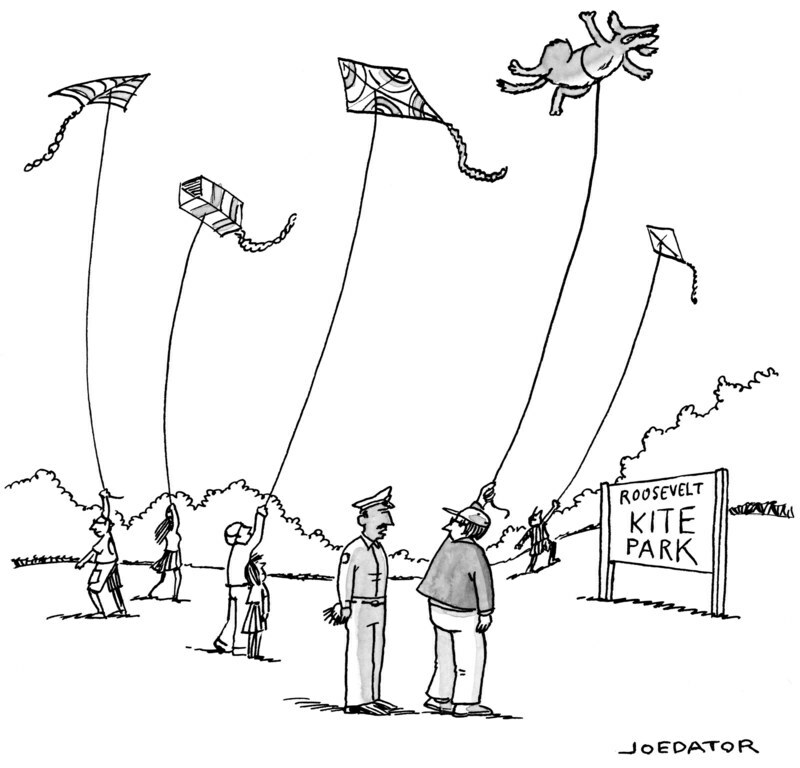

In [6]:
#Select k between 0 and 2600
k=37
img = newyorker491[k]['image']
print(f"Number of dataset entries with this image: {newyorker491[k]['contest_count']}")
img

In [7]:
# Extract the 'scene' data from the dataset
scenes = [entry['scene'] for entry in newyorker491]

In [8]:
from sentence_transformers import SentenceTransformer

# model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
# model_name="all-MiniLM-L6-v2"

# model= SentenceTransformer("Snowflake/snowflake-arctic-embed-xs")
# model_name="snowflake-arctic-embed-xs"

model = SentenceTransformer("Snowflake/snowflake-arctic-embed-m")
model_name="snowflake-arctic-embed-m"

You try to use a model that was created with version 2.7.0.dev0, however, your version is 2.7.0. This might cause unexpected behavior or errors. In that case, try to update to the latest version.





In [9]:
# Generate sentence embeddings for each scene
##You need to re-execute this when you change the model!

scene_embeddings = model.encode(scenes)

# To associate embeddings with their indices without influencing the embeddings:
indexed_embeddings = list(enumerate(scene_embeddings))


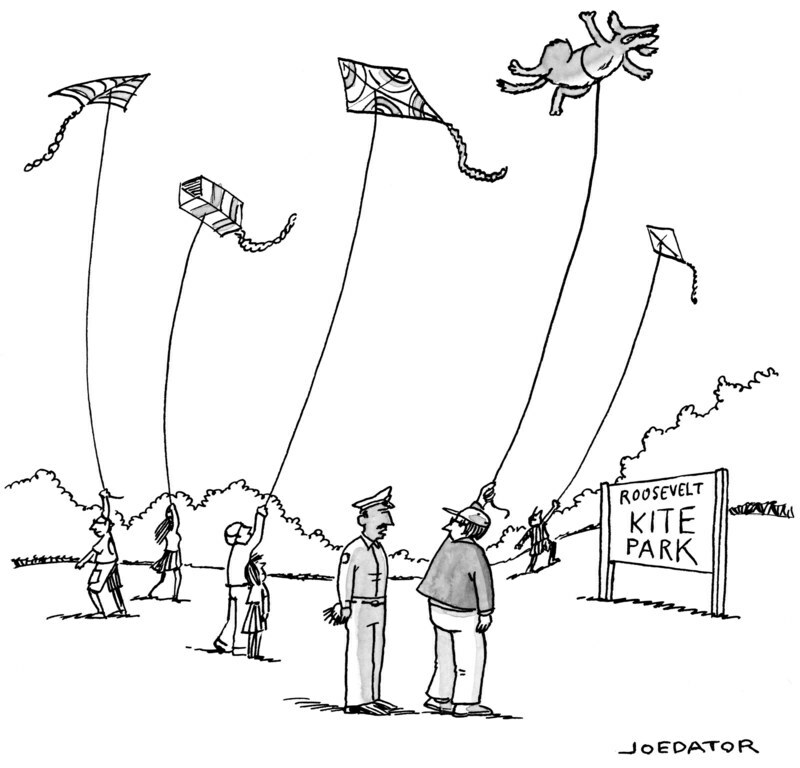

In [10]:
k=37
image_to_display = newyorker491[k]['image']
display(image_to_display)

In [11]:
my_description = ['a group of people flying kites, some being questionable']


In [12]:
query_embedding = model.encode(my_description)
# This depends on the model so be sure to re-execute if you have changed the model

In [13]:
# Select the top n
n=8
# Extract just the embeddings from the indexed_embeddings
embeddings = np.array([emb for idx, emb in indexed_embeddings])


# Calculate scores by matrix multiplication of the query_embedding with embeddings transposed
query_scores = query_embedding @ embeddings.T  # This should be a 1D array of scores
query_scores = query_scores.flatten()  # Flatten in case it's not already a 1D array

# Verify the sizes and contents
print(f"Model name: {model_name}")
print("Embeddings shape:", embeddings.shape)
print("Query Embedding shape:", query_embedding.shape)
print("Scores shape:", query_scores.shape)

# Create and sort the document-score pairs
doc_score_pairs = list(zip(indexed_embeddings, query_scores))
doc_score_pairs = sorted(doc_score_pairs, key=lambda x: x[1], reverse=True)


top_n_pairs = doc_score_pairs[:n]

# Output the query and the top passages & scores
query_text = "My description: " + my_description[0]
wrapped_query = textwrap.fill(query_text, width=75)
display(Markdown(wrapped_query))

import textwrap
from IPython.display import Markdown, display

# Display each top passage with index, score, contest number, and description
for ((index, _), score) in top_n_pairs:
    passage = scenes[index]  # Fetching the corresponding scene description
    contest = newyorker491['contest_number'][index]  # Accessing contest number
    # Format the metadata with wrapping
    score_text = f"Score: {score:.4f}, Contest Number: {contest}, Index: {index}:"
    wrapped_score_text = textwrap.fill(score_text, width=70)
    # Format the passage with wrapping
    wrapped_passage = textwrap.fill(passage, width=75)
    # Combine the wrapped text with a double newline for clear separation
    full_text = f"{wrapped_score_text}\n\n{wrapped_passage}"
    # Display using Markdown to preserve formatting
    display(Markdown(full_text))


Model name: snowflake-arctic-embed-m
Embeddings shape: (2601, 768)
Query Embedding shape: (1, 768)
Scores shape: (2601,)


My description: a group of people flying kites, some being questionable

Score: 0.7940, Contest Number: 623, Index: 1315:

Location: park. Description: Some people are flying kites at the park. A
police officer with keys is talking to one of them. Entities: Kite, Coyote

Score: 0.7757, Contest Number: 623, Index: 37:

Location: a public park. Description: Some people are flying kites at the
park. A police officer with keys is talking to one of them. Entities: Kite,
Security guard

Score: 0.7645, Contest Number: 309, Index: 2493:

Location: a roller coaster. Description: Some people are on a roller
coaster ride. Some of them are screaming. Entities: Fear, Calmness

Score: 0.7599, Contest Number: 623, Index: 2192:

Location: park. Description: Someone has an animal as a kite. They are
flying it at a park with other kites. A police officer is upset at them.
Entities: Kite, Coyote

Score: 0.7498, Contest Number: 623, Index: 1227:

Location: a public park. Description: Someone has an animal as a kite. They
are flying it at a park with other kites. A police officer is upset at
them. Entities: Kite, Security guard

Score: 0.7490, Contest Number: 493, Index: 2371:

Location: the sky. Description: Some skydivers are parachuting out of a
plane. There are two groups of them. Entities: Parachuting, Interpretive
dance

Score: 0.7450, Contest Number: 623, Index: 856:

Location: a public park. Description: Several people are flying kites at a
kite park. However, one man is flying a dog up in the air. A disapproving
police officer approached him. Entities: Kite, Security guard

Score: 0.7412, Contest Number: 623, Index: 202:

Location: park. Description: Several people are flying kites at a kite
park. However, one man is flying a dog up in the air. A disapproving police
officer approached him. Entities: Kite, Coyote